In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    # 设置图例为2行3列，并放置在右上角
    plt.legend(legend, prop={'size': 35, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.05, 1), ncol=1)
    
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 自定义x_tick显示，将数值除以100
    def format_x_tick(x, pos):
        return f'{x/1:.0f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_tick))
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    plt.title("Grid", fontsize=47, fontweight='bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)  # 调整右侧边距以容纳图例
    plt.savefig(save, bbox_inches='tight')
    plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow_accuracy(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.plot(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.plot(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.plot(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    plt.legend(legend, prop={'size': 35, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.05, 0.49), ncol=1)
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置 y 轴范围为 0 到 100
    plt.ylim(0, 100)
    
    # 设置 y 轴刻度为 0%, 20%, 40%, 60%, 80%, 100%
    plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=35, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.title("Grid", fontsize=47, fontweight='bold')
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

### 第一部分：临近图

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

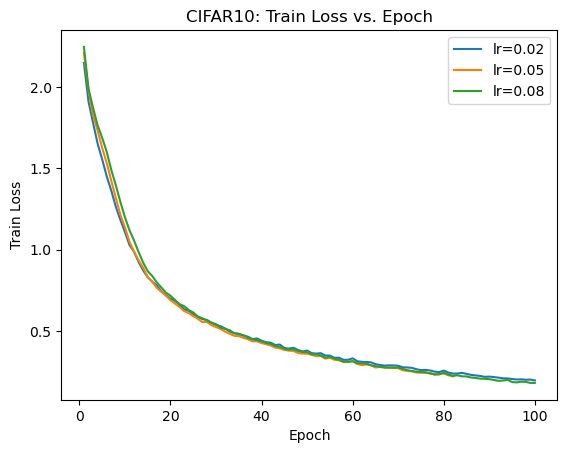

In [12]:
df1 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 临近图16, PullDiag_GT, lr=0.02, n_nodes=16, batch_size=128, 2025-02-25.csv")
df2 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 临近图16, PullDiag_GT, lr=0.05, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="lr=0.02")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="lr=0.05")
plt.plot(df3["epoch"], df3["train_loss(total)"], label="lr=0.08")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("CIFAR10: Train Loss vs. Epoch")
plt.show()

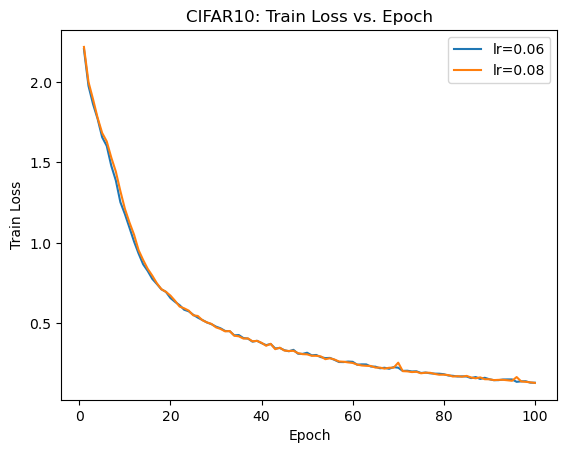

In [13]:
df1 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=5, 临近图16, PullDiag_GT, lr=0.06, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=5, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="lr=0.06")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="lr=0.08")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("CIFAR10: Train Loss vs. Epoch")
plt.show()

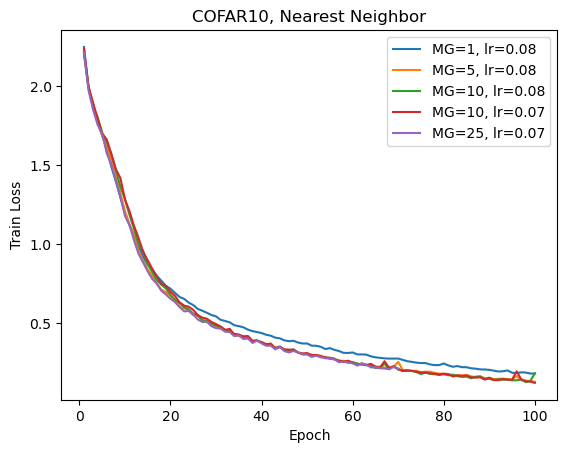

In [14]:
df1 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=5, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=10, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df4 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=10, 临近图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")
df5 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=25, 临近图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="MG=1, lr=0.08")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="MG=5, lr=0.08")
plt.plot(df3["epoch"], df3["train_loss(total)"], label="MG=10, lr=0.08")
plt.plot(df4["epoch"], df4["train_loss(total)"], label="MG=10, lr=0.07")
plt.plot(df5["epoch"], df5["train_loss(total)"], label="MG=25, lr=0.07")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("COFAR10, Nearest Neighbor")
plt.show()

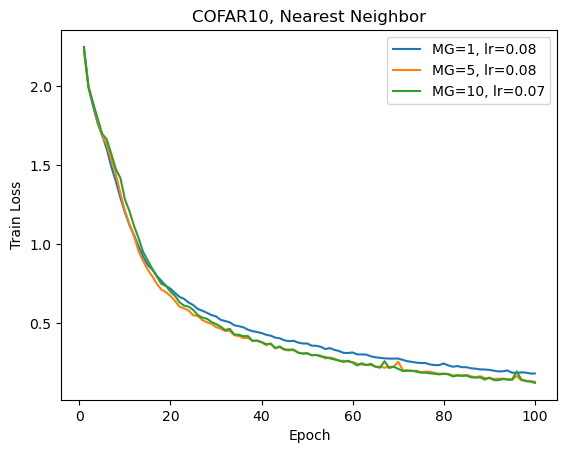

In [15]:
df1 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=5, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=10, 临近图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="MG=1, lr=0.08")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="MG=5, lr=0.08")
plt.plot(df3["epoch"], df3["train_loss(total)"], label="MG=10, lr=0.07")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("COFAR10, Nearest Neighbor")
plt.show()

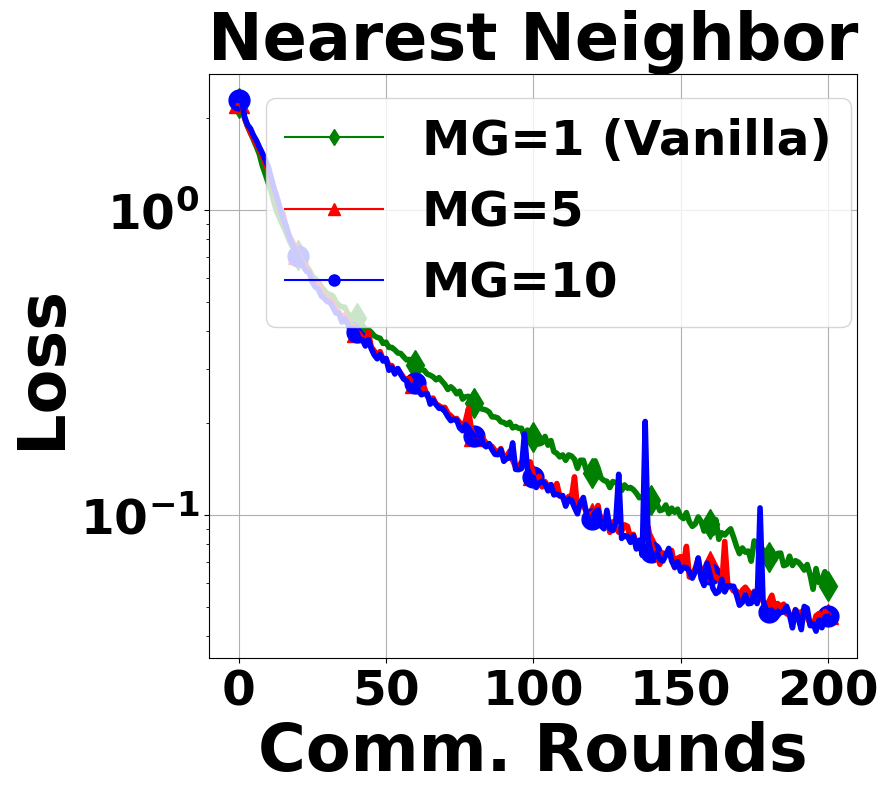

In [37]:
df1 = pd.read_csv("./CIFAR10_MG_for_draw/MG=1, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_MG_for_draw/MG=5, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_MG_for_draw/MG=10, 临近图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")

grads = [
    df1["train_loss(total)"],
    df2["train_loss(total)"],
    df3["train_loss(total)"],
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/outputs/CIFAR10_MG/临近图MG_CIFAR10_Loss.pdf', ylabel='Loss')

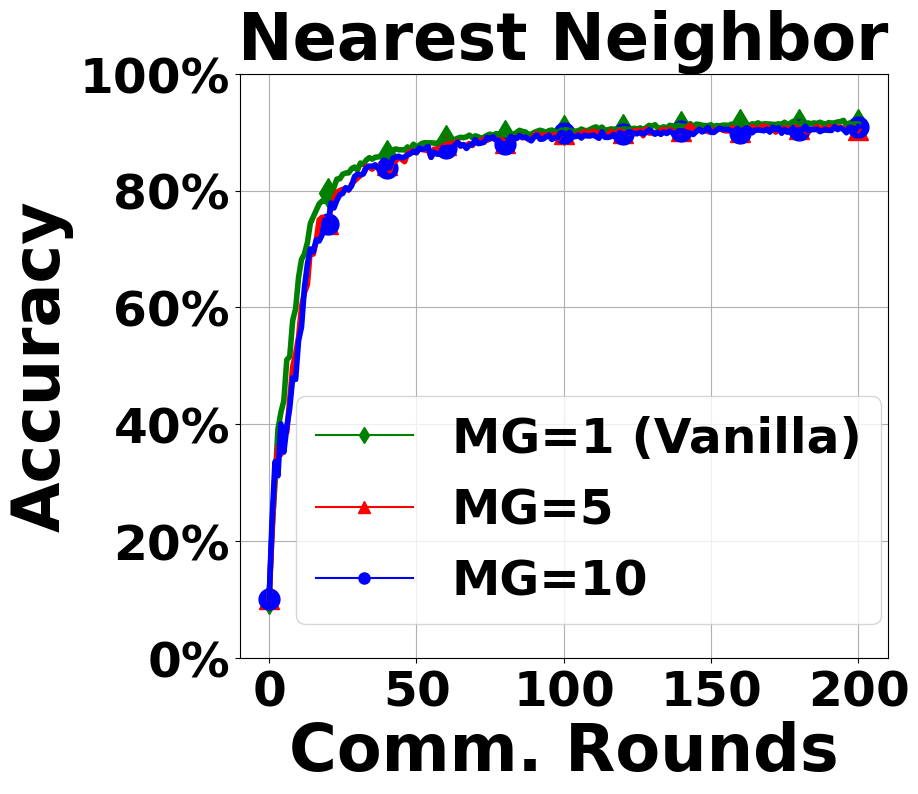

In [38]:
df1 = pd.read_csv("./CIFAR10_MG_for_draw/MG=1, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_MG_for_draw/MG=5, 临近图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_MG_for_draw/MG=10, 临近图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")

grads = [
    df1["test_accuracy(average)"]*100,
    df2["test_accuracy(average)"]*100,
    df3["test_accuracy(average)"]*100,
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow_accuracy(grads, legend, save='/Users/luogan/Code/ICML2025_project/outputs/CIFAR10_MG/临近图MG_CIFAR10_Accuracy.pdf', ylabel='Accuracy')

### 第二部分：几何图

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

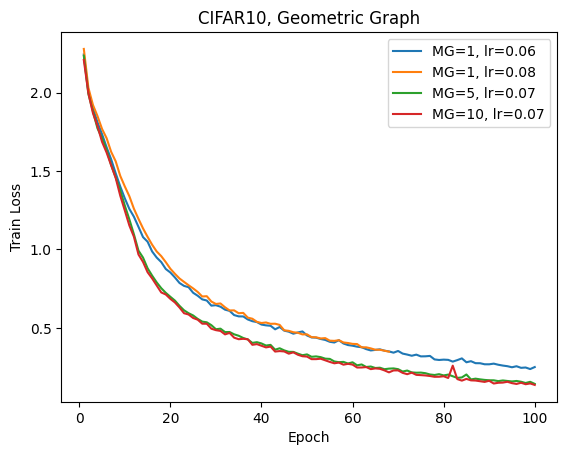

In [23]:
df1 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 几何图16, PullDiag_GT, lr=0.06, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, 几何图16, PullDiag_GT, lr=0.08, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=5, 几何图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")
df4 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=10, 几何图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-02-27.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="MG=1, lr=0.06")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="MG=1, lr=0.08")
plt.plot(df3["epoch"], df3["train_loss(total)"], label="MG=5, lr=0.07")
plt.plot(df4["epoch"], df4["train_loss(total)"], label="MG=10, lr=0.07")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("CIFAR10, Geometric Graph")
plt.show()

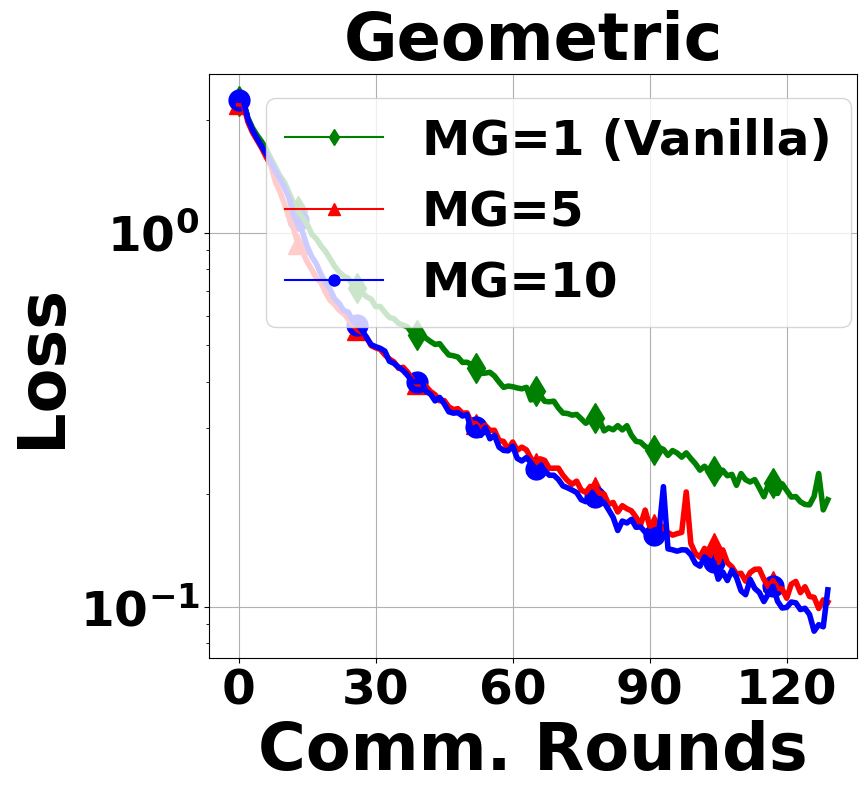

In [33]:
df1 = pd.read_csv("./CIFAR10_MG_for_draw/MG=1, 几何图16, PullDiag_GT, lr=0.06, n_nodes=16, batch_size=128, 2025-03-02.csv")
df2 = pd.read_csv("./CIFAR10_MG_for_draw/MG=5, 几何图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-03-02.csv")
df3 = pd.read_csv("./CIFAR10_MG_for_draw/MG=10, 几何图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-03-02.csv")

a = 130

grads = [
    df1["train_loss(total)"][:a],
    df2["train_loss(total)"][:a],
    df3["train_loss(total)"][:a],
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/outputs/CIFAR10_MG/几何图MG_CIFAR10_Loss.pdf', ylabel='Loss')

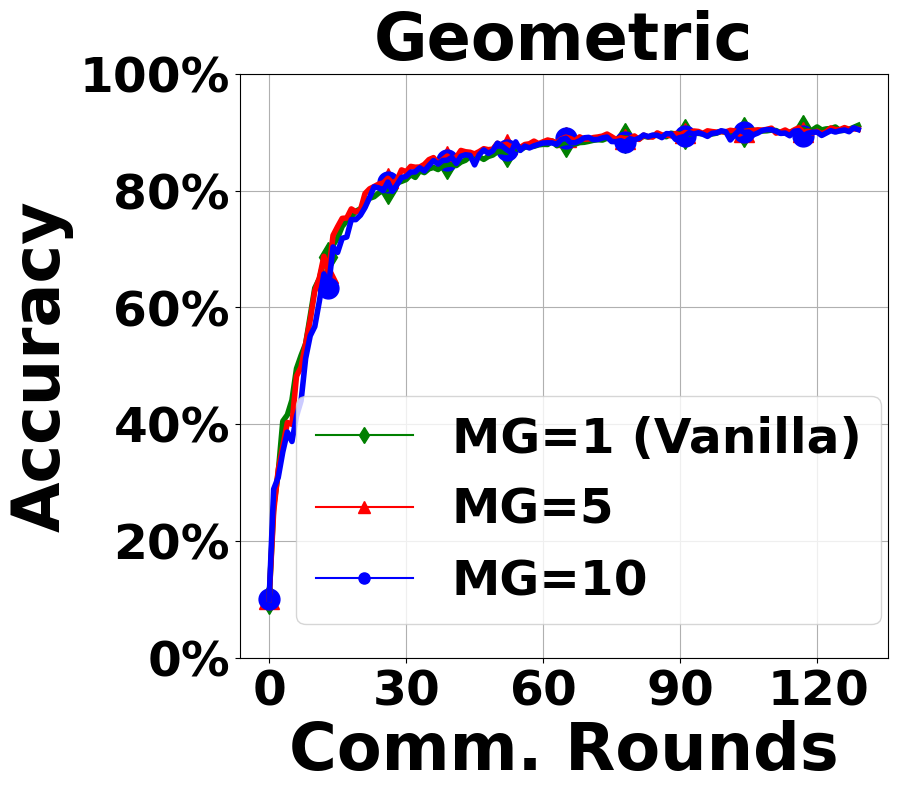

In [34]:
df1 = pd.read_csv("./CIFAR10_MG_for_draw/MG=1, 几何图16, PullDiag_GT, lr=0.06, n_nodes=16, batch_size=128, 2025-03-02.csv")
df2 = pd.read_csv("./CIFAR10_MG_for_draw/MG=5, 几何图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-03-02.csv")
df3 = pd.read_csv("./CIFAR10_MG_for_draw/MG=10, 几何图16, PullDiag_GT, lr=0.07, n_nodes=16, batch_size=128, 2025-03-02.csv")

a = 130

grads = [
    df1["test_accuracy(average)"][:a]*100,
    df2["test_accuracy(average)"][:a]*100,
    df3["test_accuracy(average)"][:a]*100,
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow_accuracy(grads, legend, save='/Users/luogan/Code/ICML2025_project/outputs/CIFAR10_MG/几何图MG_CIFAR10_Accuracy.pdf', ylabel='Accuracy')

### 第三部分: Ring图

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

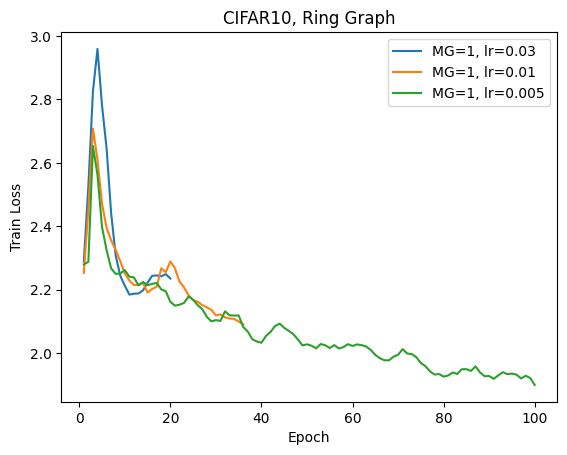

In [2]:
df1 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, Ring16, PullDiag_GT, lr=0.03, n_nodes=16, batch_size=128, 2025-02-27.csv")
df2 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, Ring16, PullDiag_GT, lr=0.01, n_nodes=16, batch_size=128, 2025-02-27.csv")
df3 = pd.read_csv("./CIFAR10_Multi_Gossip/MG=1, Ring16, PullDiag_GT, lr=0.005, n_nodes=16, batch_size=128, 2025-02-27.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="MG=1, lr=0.03")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="MG=1, lr=0.01")
plt.plot(df3["epoch"], df3["train_loss(total)"], label="MG=1, lr=0.005")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("CIFAR10, Ring Graph")
plt.show()

### 第四部分: Grid

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

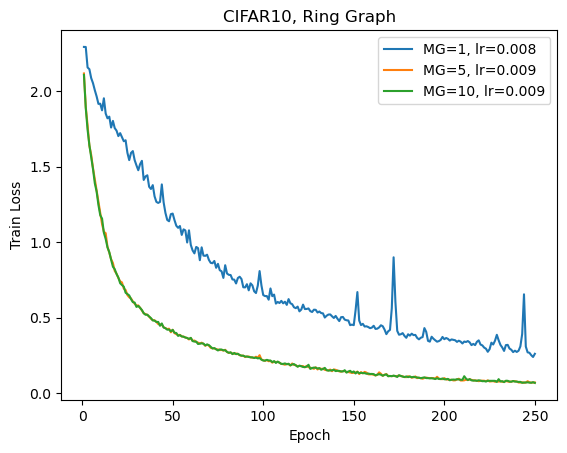

In [3]:
df1 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=1, Grid16, PullDiag_GT, lr=0.008, n_nodes=16, batch_size=128, 2025-03-03.csv")
df2 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=5, Grid16, PullDiag_GT, lr=0.009, n_nodes=16, batch_size=128, 2025-03-03.csv")
df3 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=10, Grid16, PullDiag_GT, lr=0.009, n_nodes=16, batch_size=128, 2025-03-03.csv")

plt.plot(df1["epoch"], df1["train_loss(total)"], label="MG=1, lr=0.008")
plt.plot(df2["epoch"], df2["train_loss(total)"], label="MG=5, lr=0.009")
plt.plot(df3["epoch"], df3["train_loss(total)"], label="MG=10, lr=0.009")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("CIFAR10, Ring Graph")
plt.show()

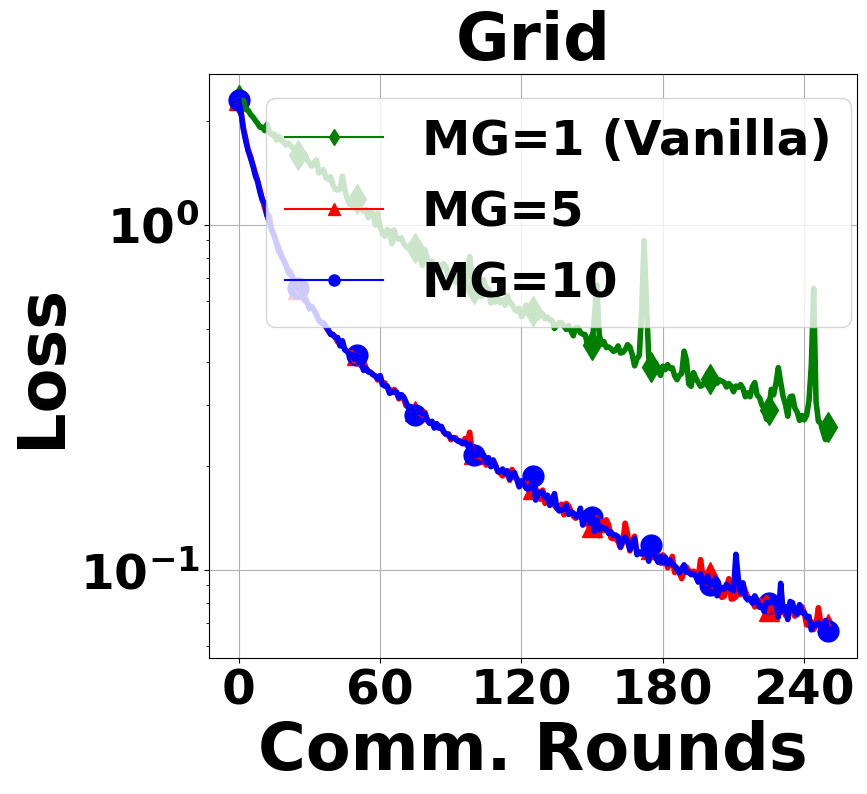

In [10]:
df1 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=1, Grid16, PullDiag_GT, lr=0.008, n_nodes=16, batch_size=128, 2025-03-03.csv")
df2 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=5, Grid16, PullDiag_GT, lr=0.009, n_nodes=16, batch_size=128, 2025-03-03.csv")
df3 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=10, Grid16, PullDiag_GT, lr=0.009, n_nodes=16, batch_size=128, 2025-03-03.csv")

grads = [
    df1["train_loss(total)"],
    df2["train_loss(total)"],
    df3["train_loss(total)"],
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow(grads, legend, save='/Users/luogan/Code/ICML2025_project/outputs/CIFAR10_MG/Grid_MG_CIFAR10_Loss.pdf', ylabel='Loss')

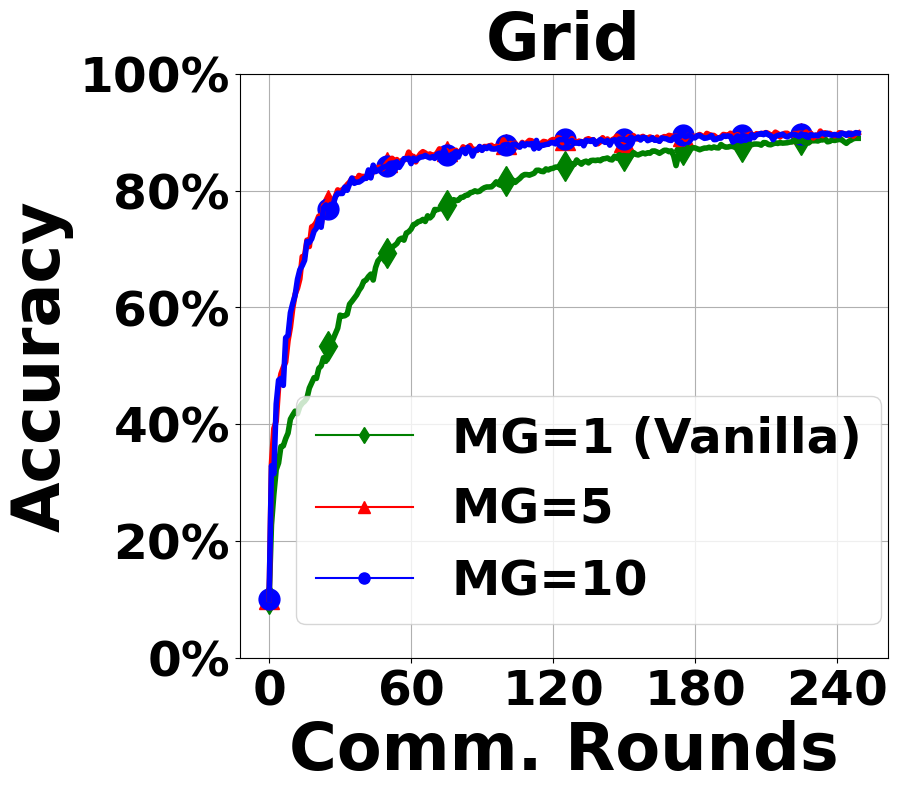

In [11]:
df1 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=1, Grid16, PullDiag_GT, lr=0.008, n_nodes=16, batch_size=128, 2025-03-03.csv")
df2 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=5, Grid16, PullDiag_GT, lr=0.009, n_nodes=16, batch_size=128, 2025-03-03.csv")
df3 = pd.read_csv("/Users/luogan/Code/ICML2025_project/outputs/logs/CIFAR10_MG_for_draw/MG=10, Grid16, PullDiag_GT, lr=0.009, n_nodes=16, batch_size=128, 2025-03-03.csv")

a = 250

grads = [
    df1["test_accuracy(average)"][:a]*100,
    df2["test_accuracy(average)"][:a]*100,
    df3["test_accuracy(average)"][:a]*100,
    ]
legend = [
    "MG=1 (Vanilla)",
    "MG=5",
    "MG=10",
]

prettyshow_accuracy(grads, legend, save='/Users/luogan/Code/ICML2025_project/outputs/CIFAR10_MG/Grid_MG_CIFAR10_Accuracy.pdf', ylabel='Accuracy')